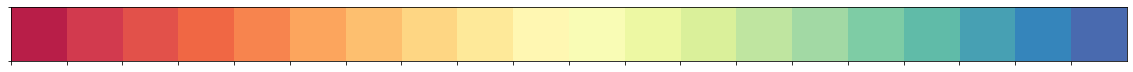

In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

pal = sns.color_palette("Spectral", 20)
customPalette = pal.as_hex()
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [2]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

In [3]:
repres_gut = pd.read_csv(analysis+'/mmseqs2/bacteria_gut/clustering_0.9seqid_0.9c.tsv',
           sep='\t', header=None, names=['rpr', 'protein'])

repres_gut['rpr'].unique().shape

(13992739,)

In [4]:
repres_gut.head()

rpr                protein
0  GUT_GENOME083834_29_3  GUT_GENOME083834_29_3
1  GUT_GENOME083834_33_2  GUT_GENOME083834_33_2
2  GUT_GENOME083834_33_2  GUT_GENOME259660_4_53
3  GUT_GENOME083834_33_2  GUT_GENOME282387_98_2
4  GUT_GENOME083834_33_2  GUT_GENOME118743_6_91

In [5]:
# create the id column
repres_gut.rpr = pd.Categorical(repres_gut.rpr)
repres_gut['cluster'] = repres_gut.rpr.cat.codes
repres_gut.head()

# count how many proteins are in clusters and plot: 
clusters_gut = repres_gut[['cluster',  'protein']].sort_values('cluster')

cluster_counts_gut = clusters_gut.groupby('cluster', as_index=False).agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)

In [6]:
# plt.hist(cluster_counts_gut[(cluster_counts_gut['count']>=50)]['count'], color = 'forestgreen', edgecolor = 'black',
#          bins = 100)

# plt.title('protein clusters: gut bacteria \n distribution of proteins (above 50) in clusters \n')
# plt.xlabel('proteins in cluster')
# plt.ylabel('count')
# plt.xlim(left=5)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# # plt.savefig(pics+'/protein_clusters_gut_bacteria>50.png', quality = 95, dpi = 200)

# plt.show()

# plt.hist(cluster_counts_gut[(cluster_counts_gut['count']<=50)]['count'], color = 'forestgreen', edgecolor = 'black',
#          bins = 50)

# plt.title('protein clusters: gut bacteria \n distribution of proteins (below 50) in clusters \n')
# plt.xlabel('proteins in cluster')
# plt.ylabel('count')
# plt.xlim(left=0)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

# # plt.savefig(pics+'/protein_clusters_gut_bacteria<50.png', quality = 95, dpi = 200)

In [7]:
cluster_counts_gut[cluster_counts_gut['count']>=10].shape, cluster_counts_gut[cluster_counts_gut['count']>=5].shape

((1967480, 2), (2987409, 2))

In [8]:
bac_gut_proteins = repres_gut.merge(cluster_counts_gut[cluster_counts_gut['count']>=10], on='cluster')[['protein', 'cluster']]


In [9]:
bac_gut_proteins.cluster = 'b_' + bac_gut_proteins.cluster.astype(str)

In [10]:
bac_gut_proteins.groupby('cluster')\
.agg({'protein':'count'})\
.sort_values('protein')


protein
cluster            
b_5340499        10
b_576581         10
b_576573         10
b_11449          10
b_576557         10
...             ...
b_13571278     2014
b_1923877      2035
b_759968       2040
b_45839        2265
b_6289753      3336

[1967480 rows x 1 columns]

In [11]:
bac_gut_proteins[['cluster']].nunique()

cluster    1967480
dtype: int64

In [12]:
bac_gut_proteins

protein    cluster
0           GUT_GENOME083834_33_2  b_6909378
1           GUT_GENOME259660_4_53  b_6909378
2           GUT_GENOME282387_98_2  b_6909378
3           GUT_GENOME118743_6_91  b_6909378
4            GUT_GENOME281911_7_7  b_6909378
...                           ...        ...
64498552  GUT_GENOME143134_1_2943  b_7460573
64498553   GUT_GENOME096177_7_144  b_7460573
64498554   GUT_GENOME141055_147_8  b_7460573
64498555   GUT_GENOME098776_110_7  b_7460573
64498556     GUT_GENOME231240_7_4  b_7460573

[64498557 rows x 2 columns]

In [13]:
bac_gut_proteins[bac_gut_proteins.cluster == 'b_9199668']

protein    cluster
46610127   GUT_GENOME140249_9_12  b_9199668
46610128   GUT_GENOME105416_6_65  b_9199668
46610129   GUT_GENOME280065_5_12  b_9199668
46610130  GUT_GENOME096391_3_298  b_9199668
46610131  GUT_GENOME175019_47_14  b_9199668
46610132   GUT_GENOME153209_4_46  b_9199668
46610133   GUT_GENOME258027_8_11  b_9199668
46610134   GUT_GENOME271946_5_12  b_9199668
46610135   GUT_GENOME258003_5_14  b_9199668
46610136   GUT_GENOME140244_8_12  b_9199668
46610137  GUT_GENOME106271_4_140  b_9199668
46610138   GUT_GENOME265007_8_67  b_9199668

match clusters to representatives to get only those needed to be analyzed

In [17]:
rpr2cluster = repres_gut[['rpr', 'cluster']].drop_duplicates(['rpr', 'cluster'])
rpr2cluster.cluster = 'b_' + rpr2cluster.cluster.astype(str)
rpr2cluster.head()

rpr    cluster
0   GUT_GENOME083834_29_3  b_6909354
1   GUT_GENOME083834_33_2  b_6909378
11  GUT_GENOME083834_35_1  b_6909384
12  GUT_GENOME083834_45_2  b_6909437
13   GUT_GENOME084116_5_5  b_6914354

In [18]:
rprs_for_distance_measure = bac_gut_proteins.merge(rpr2cluster, on=['cluster'])[['rpr', 'cluster']].drop_duplicates(['rpr', 'cluster'])
rprs_for_distance_measure.head()


rpr    cluster
0     GUT_GENOME083834_33_2  b_6909378
10    GUT_GENOME084116_85_4  b_6914379
133  GUT_GENOME084610_30_23  b_6923533
146  GUT_GENOME084615_20_10  b_6923626
157   GUT_GENOME084794_98_4  b_6927132

In [19]:
rprs_for_distance_measure.cluster.nunique()

1967480

compile instructions

In [ ]:
bac_gut_proteins.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_clusters.tsv', 
index=False, sep='\t', header=None)

In [20]:
rprs_for_distance_measure.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_representatives.tsv',
         index=False, sep='\t')

### Import annotation: 

In [13]:
db = 'kegg'
### Loop the data lines
with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_"+db+".tsv", 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = [i for i in range(0, max(col_count))]

### Read csv
df = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_'+db+'.tsv', delimiter="\t", names=column_names)
df.dropna(axis=1, how='all', inplace=True)
df.columns=['protein', 'id', 'description']
annot_kegg = df

In [15]:
bac_gut_proteins = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_clusters.tsv', 
                               sep='\t', header=None, names = ['protein', 'cluster'])

protein    cluster
0           GUT_GENOME084116_85_4  b_6914379
1               3300029099_20_451  b_6914379
2               3300029381_21_762  b_6914379
3               3300029793_21_645  b_6914379
4               3300029850_21_685  b_6914379
...                           ...        ...
53423153  GUT_GENOME143134_1_2943  b_7460573
53423154   GUT_GENOME096177_7_144  b_7460573
53423155   GUT_GENOME141055_147_8  b_7460573
53423156   GUT_GENOME098776_110_7  b_7460573
53423157     GUT_GENOME231240_7_4  b_7460573

[53423158 rows x 2 columns]

In [16]:
annotation_bac_prots = bac_gut_proteins.merge(annot_kegg, on='protein')

In [17]:
bac_protein_functions = annotation_bac_prots\
.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)

bac_protein_functions.head()

id                                        description   count
13444  K18908                              multidrug efflux pump  271212
2453   K03088      RNA polymerase sigma-70 factor, ECF subfamily  271089
15264  K21573  TonB-dependent starch-binding outer membrane p...  245681
15263  K21572  starch-binding outer membrane protein, SusD/Ra...  219607
1585   K01990    ABC-2 type transport system ATP-binding protein  181212

In [18]:
bac_protein_functions.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/bac_protein_functions.tsv',
         index=False, sep='\t')

there are annotated clusters with n=1 proteins

In [15]:
tmp = annotation_bac_prots\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False)

tmp.tail()

cluster  count
271987   b_12314602      1
1008177   b_5427745      1
752921    b_3673416      1
1072167   b_5853822      1
237705   b_11866857      1

In [16]:
tmp.shape

(1598393, 2)

In [17]:
tmp[tmp['count']==1].shape

(4847, 2)

In [18]:
tmp[tmp['count']>=10].shape

(1537608, 2)

keep only those clusters in which 10+ are annotated:

In [22]:
annotation_bac_prots = annotation_bac_prots.merge(tmp[tmp['count']>=10][['cluster']])


annotation_bac_prots\
.groupby(['cluster'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})\
.sort_values('count', ascending=False).tail()

cluster  count
49353   b_10359157     10
49352   b_10359155     10
49349   b_10359146     10
49348   b_10359144     10
292058  b_12564123     10

In [23]:
annotation_bac_prots.to_csv(analysis+'/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t', index=False)

## check which functions are similar to archaea unique functions in gut

In [6]:
unique_annot_kegg = pd.read_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv',
           sep='\t')

In [20]:
bac_protein_functions = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/bac_protein_functions.tsv',
                                    sep='\t')

In [22]:
unique_annot_kegg.rename(columns={'count_y':'count_arch'}, inplace=True)
unique_annot_kegg = unique_annot_kegg[['protein', 'cluster', 'id', 'description', 'count_arch']]

check how many proteins are in anontated clusters 

In [23]:
unique_annot_kegg.tail(2)

protein  cluster      id            description  \
1345  GUT_GENOME247693.fasta_1138    14361  K10171  toll-like receptor 10   
1346  GUT_GENOME015317.fasta_1754    14361  K10171  toll-like receptor 10   

      count_arch  
1345           2  
1346           2

In [24]:
bac_protein_functions.tail(2)

id                                        description  count
17213  K15929                                glycosyltransferase      1
17214  K06863  5-formaminoimidazole-4-carboxamide-1-(beta)-D-...      1

In [25]:
unique_annot_kegg = unique_annot_kegg[unique_annot_kegg.count_arch!=1]
bac_protein_functions = bac_protein_functions[bac_protein_functions['count']!=1]

find arch and bac proteins with common functions 

In [26]:
bac_arch_intersection = bac_protein_functions.merge(unique_annot_kegg, on=['id', 'description'])
bac_arch_intersection

id                                        description  count  \
0     K06406                     stage V sporulation protein AD  18720   
1     K06406                     stage V sporulation protein AD  18720   
2     K06406                     stage V sporulation protein AD  18720   
3     K06406                     stage V sporulation protein AD  18720   
4     K06406                     stage V sporulation protein AD  18720   
...      ...                                                ...    ...   
1086  K11518        mitochondrial import receptor subunit TOM40      2   
1087  K11518        mitochondrial import receptor subunit TOM40      2   
1088  K11518        mitochondrial import receptor subunit TOM40      2   
1089  K13869  solute carrier family 7 (L-type amino acid tra...      2   
1090  K13869  solute carrier family 7 (L-type amino acid tra...      2   

                          protein  cluster  count_arch  
0     GUT_GENOME048380.fasta_1664    38745           3  
1     GUT_GENOME117833.fasta_1758    38745           3  
2     GUT_GENOME048397.fasta_1606    38745           3  
3     GUT_GENOME178294.fasta_1793   125216           2  
4     GUT_GENOME150013.fasta_1736   125216           2  
...                           ...      ...         ...  
1086   GUT_GENOME078850.fasta_322    74756           6  
1087     GUT_GENOME139935.fasta_1    74756           6  
1088   GUT_GENOME103665.fasta_587    74756           6  
1089  GUT_GENOME201908.fasta_1117   155363           2  
1090   GUT_GENOME195804.fasta_507   155363           2  

[1091 rows x 6 columns]

find most frequent common functions

In [39]:
bac_protein_functions[['id', 'description']].merge(unique_annot_kegg, on=['id', 'description'])

id                                        description  \
0     K06406                     stage V sporulation protein AD   
1     K06406                     stage V sporulation protein AD   
2     K06406                     stage V sporulation protein AD   
3     K06406                     stage V sporulation protein AD   
4     K06406                     stage V sporulation protein AD   
...      ...                                                ...   
1086  K11518        mitochondrial import receptor subunit TOM40   
1087  K11518        mitochondrial import receptor subunit TOM40   
1088  K11518        mitochondrial import receptor subunit TOM40   
1089  K13869  solute carrier family 7 (L-type amino acid tra...   
1090  K13869  solute carrier family 7 (L-type amino acid tra...   

                          protein  cluster  count_arch  
0     GUT_GENOME048380.fasta_1664    38745           3  
1     GUT_GENOME117833.fasta_1758    38745           3  
2     GUT_GENOME048397.fasta_1606    38745           3  
3     GUT_GENOME178294.fasta_1793   125216           2  
4     GUT_GENOME150013.fasta_1736   125216           2  
...                           ...      ...         ...  
1086   GUT_GENOME078850.fasta_322    74756           6  
1087     GUT_GENOME139935.fasta_1    74756           6  
1088   GUT_GENOME103665.fasta_587    74756           6  
1089  GUT_GENOME201908.fasta_1117   155363           2  
1090   GUT_GENOME195804.fasta_507   155363           2  

[1091 rows x 5 columns]

In [40]:
bac_protein_functions[['id', 'description']].merge(unique_annot_kegg, on=['id', 'description'])\
.sort_values('count_arch', ascending=False)\
.groupby(['id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False).head(25)

id                                        description  protein
37  K14495                                 F-box protein GID2      399
26  K11234                      mating pheromone alpha-factor      158
23  K10436       microtubule-associated protein, RP/EB family       94
30  K12706               novobiocin biosynthesis protein NovC       54
3   K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2       42
67  K23498                       peptide chain release factor       42
58  K19543               aminoglycoside 3'-phosphotransferase       25
62  K21577  glycine/sarcosine/betaine reductase complex co...       19
47  K16195  eukaryotic translation initiation factor 2-alp...       18
50  K17465          D-glucosaminate PTS system EIIB component       13
18  K09469      2-aminoethylphosphonate-pyruvate transaminase       12
66  K22554                 acyl-coenzyme A thioesterase THEM5       11
53  K19082  two-component system, OmpR family, response re...       10
56  K19481                                 matrix Gla protein        7
14  K06577                      Kell blood group glycoprotein        7
46  K16158       methane monooxygenase component A beta chain        7
1   K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...        7
34  K13546                    2-deoxy-scyllo-inosose synthase        7
12  K06406                     stage V sporulation protein AD        7
5   K02734                      20S proteasome subunit beta 4        6
27  K11518        mitochondrial import receptor subunit TOM40        6
41  K15198          transcription factor TFIIIB component B''        5
54  K19180       dTDP-6-deoxy-L-talose 4-dehydrogenase (NAD+)        5
29  K12091                 cag pathogenicity island protein 6        5
70  K24356                            collagen type XXV alpha        5

In [38]:
bac_protein_functions[bac_protein_functions.id.isin(unique_annot_kegg.id)][['id']]
# .merge(annotation_bac_prots)[['cluster']]

id
5172   K06406
5173   K06407
10268  K13059
14569  K19082
14898  K19506
...       ...
10377  K13208
10955  K13959
10883  K13869
9047   K11518
17068  K22406

[78 rows x 1 columns]

find bacterial protein clusters with proteins of functions occuring in archaea

In [27]:
candidate_bac_clusters_for_msa = bac_protein_functions[bac_protein_functions.id.isin(unique_annot_kegg.id)][['id']].merge(annotation_bac_prots)[['cluster']]
clusters_to_analyze = bac_gut_proteins[bac_gut_proteins.cluster.isin(candidate_bac_clusters_for_msa.cluster)]
clusters_to_analyze.head()
# 2+ proteins

cluster
0       b_10950028
1       b_10950028
2       b_10950028
3       b_10950028
4       b_10950028
...            ...
108005   b_2079572
108006   b_5084734
108007   b_5084734
108008   b_3485815
108009   b_3485815

[108010 rows x 1 columns]

In [47]:
bac_gut_proteins.cluster.nunique() # all

1967480

In [32]:
clusters_to_analyze.cluster.nunique() # FR

2601

In [33]:
unique_annot_kegg.cluster.nunique() # FR


175

In [66]:
clusters_to_analyze.to_csv(analysis+'/intermediate_results/instructions_bac_func_relat_clusters.tsv', index=False, sep='\t')


In [67]:
unique_annot_kegg[['protein', 'cluster']].to_csv(analysis+'/intermediate_results/instructions_arch_func_relat_clusters.tsv', index=False, sep='\t')


In [37]:
# pd.DataFrame(unique_annot_kegg.cluster.unique()).to_csv(analysis+'/intermediate_results/tmp_arch_FR_2use.tsv',
#                                                        header=None, index=False)

# pd.DataFrame(clusters_to_analyze.cluster.unique()).to_csv(analysis+'/intermediate_results/tmp_bac_FR_2use.tsv',
#                                                        header=None, index=False)